# AML-2203 

# Advanced Python AI and ML Tools Assignment 1

Submitted By:
Suyog Adhikari (C0874820),
Nabin Prasad Dev (C0880973),
Sabin Pokhrel (C0870339), 
Dhiraj Kumar Sah (C0869896)


In [911]:
import pandas as pd
import numpy as np
import requests
import re
import time
import random
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import Binarizer
from selenium import webdriver
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
from bs4 import BeautifulSoup
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from pandas_profiling import ProfileReport

#  Scrapping Car Data From Kijiji 

#### Defining base url of where data will be extracted

In [2]:
base_url = "https://www.kijiji.ca"

#### Empty dataframe to store extracted data

In [3]:
df = pd.DataFrame(columns=['Make', 'FuelType','City','Year','Body','Price','Model','Province','Condition','KM'])

#### Setting session with retries and a delay between requests

In [4]:
session = requests.Session()
retries = Retry(total=5, backoff_factor=1, status_forcelist=[ 500, 502, 503, 504 ])
session.mount('http://', HTTPAdapter(max_retries=retries))
session.mount('https://', HTTPAdapter(max_retries=retries))

#### send request after some delay

In [5]:
def request_delay():
    delay = random.randint(30, 60)
    time.sleep(delay)

### loop over each page and extract and store ads of each page in a beautiful soup object  then using regular expression to extract the data from text content 

In [6]:
pages_to_scrape = 100 # defining the number of pages to be scraped
# For loop to loop through all the pages defined above

for i in range(1, pages_to_scrape+1):
    request_delay()
    
    # declaring varibale for url of the page to get through
    url = f"{base_url}/b-cars-trucks/ontario/page-{i}/c27l9004?rb=true"
    

    # using seseion's get funtion to get the response of that website 
    response = session.get(url)
    # soup object to hold the content of te site
    soup = BeautifulSoup(response.content, "html.parser")

    # find all methd to find the ads from the soup
    listings = soup.find_all("div", attrs={"class": ["search-item", "regular-ad"]})
    print(f"Found {len(listings)} listings on page {i}")

    # validating and filtering the listing so that we only get  geniune ads
    listings = [x for x in listings if ("cas-channel" not in x["class"]) & ("third-party" not in x["class"])]

    # looping over all the ads present in the listing variable and exteacting the desired variabl to sotre in a dataFrame 
    for listing in listings:
        # extracting the url of the ad to get the detail attribute of the ads
        detail_url = listing.find('a', {'class': 'title'})['href']
        # Validadting the obtainded url
        detail_url_ = detail_url if detail_url.startswith('http') else base_url + detail_url 
        # extracting the value of the details of ads
        detail_response = session.get(detail_url_)
        detail_soup = BeautifulSoup(detail_response.content, "html.parser")
        # locating and storing the value generetade by a web pagewithin a script tag
        targeting_script = detail_soup.find(lambda tag: tag.name == 'script' and 'gptAdTargeting.push' in tag.text)
        
        try: 
            #using regular expression re to get the value from the conveted text of the beautiful soup object
            fueltype = re.search(r"fueltype', value: '(\w+)'", str(targeting_script)).group(1)
        except AttributeError:
            # validating the varibale in exception by using numpy null 
            fueltype=np.nan
        try: 
            year = re.search(r"year', value: '(\d+)'", str(targeting_script)).group(1)
        except AttributeError:
            year = np.nan
        try: 
            price=re.search(r"price', value: '(\d+)'", str(targeting_script)).group(1)
        except AttributeError:
            price = np.nan
        try: 
            location=re.search(r"location', value: '(\w+)'", str(targeting_script)).group(1)
        except AttributeError:
            location = np.nan
        try: 
            city=re.search(r"city', value: '(\w+)'", str(targeting_script)).group(1)
        except AttributeError:
            city = np.nan
        try: 
            body=re.search(r"body', value: '(\w+)'", str(targeting_script)).group(1)
        except AttributeError:
            body = np.nan
        try: 
            model=re.search(r"model', value: '(\w+)'", str(targeting_script)).group(1)
        except AttributeError:
            model = np.nan
        try: 
            make=re.search(r"make', value: '(\w+)'", str(targeting_script)).group(1)
        except AttributeError:
            make=np.nan
        try: 
            km=re.search(r"km', value: '(\d+)'", str(targeting_script)).group(1)
        except AttributeError:
            km = np.nan
        try: 
            province=re.search(r"province', value: '(\w+)'", str(targeting_script)).group(1)
        except AttributeError:
            province = np.nan
        try: 
            condition=re.search(r"condition', value: '(\w+)'", str(targeting_script)).group(1)
        except AttributeError:
            condition = np.nan
        #  appending the dataframe with the extracted value from the converted text
        df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)



Found 45 listings on page 1


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 2
Found 45 listings on page 3


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)


Found 0 listings on page 4
Found 45 listings on page 5


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 6
Found 45 listings on page 7


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)


Found 0 listings on page 8
Found 45 listings on page 9


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 10
Found 45 listings on page 11


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 12
Found 45 listings on page 13


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 14
Found 45 listings on page 15


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)


Found 0 listings on page 16
Found 45 listings on page 17


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 18
Found 45 listings on page 19


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 20
Found 45 listings on page 21


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)


Found 0 listings on page 22
Found 45 listings on page 23


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 24
Found 45 listings on page 25


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)


Found 0 listings on page 26
Found 45 listings on page 27


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)


Found 0 listings on page 28
Found 45 listings on page 29


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)


Found 0 listings on page 30
Found 45 listings on page 31


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 32
Found 45 listings on page 33


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 34
Found 45 listings on page 35


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 36
Found 45 listings on page 37


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 38
Found 45 listings on page 39


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 40
Found 45 listings on page 41


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 42
Found 45 listings on page 43


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 44
Found 45 listings on page 45


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 46
Found 45 listings on page 47


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 48
Found 45 listings on page 49


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 50
Found 45 listings on page 51


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 52
Found 45 listings on page 53


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 54
Found 45 listings on page 55


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 56
Found 45 listings on page 57


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 58
Found 45 listings on page 59


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 60
Found 45 listings on page 61


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 62
Found 45 listings on page 63


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 64
Found 45 listings on page 65


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 66
Found 0 listings on page 67
Found 45 listings on page 68


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)


Found 0 listings on page 69
Found 45 listings on page 70


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 71
Found 45 listings on page 72


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 73
Found 45 listings on page 74


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 75
Found 45 listings on page 76


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 77
Found 45 listings on page 78


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 79
Found 45 listings on page 80


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)


Found 0 listings on page 81
Found 45 listings on page 82


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 83
Found 45 listings on page 84


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)


Found 0 listings on page 85
Found 45 listings on page 86


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 87
Found 45 listings on page 88


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 89
Found 45 listings on page 90


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)


Found 0 listings on page 91
Found 45 listings on page 92


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)


Found 0 listings on page 93
Found 45 listings on page 94


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 95
Found 45 listings on page 96


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 97
Found 45 listings on page 98


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 45 listings on page 99


C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':make, 'FuelType':fueltype,'City':city,'Year':year,'Body':body,'Price':price,'Model':model,'Province':province,'Condition':condition,'KM':km}, ignore_index=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_21704\3532115029.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Make':

Found 0 listings on page 100


In [7]:
df.shape

(2250, 10)

In [8]:
df.head()

,Make,FuelType,City,Year,Body,Price,Model,Province,Condition,KM
0,bmw,gasoline,NaN,2014,hatchback,19788,NaN,ontario,used,112358
1,chevrolet,gasoline,barrie,2018,suv_crossover,22995,equinox,ontario,used,59009
2,porsche,gasoline,london,2019,suv_crossover,55000,macan,ontario,used,58862
3,NaN,NaN,torontogta,NaN,NaN,0,NaN,ontario,NaN,NaN
4,NaN,NaN,torontogta,NaN,NaN,0,NaN,ontario,NaN,NaN


In [9]:
df.duplicated().sum()

821

## Saving scraped data in csv format

In [10]:
# df.to_csv('march25_kijiji1.csv')

In [385]:
# igonring warning

In [1109]:
warnings.filterwarnings('ignore')

## Reading data from csv

In [1211]:
dataFrame1 = pd.read_csv('march22_kijiji5.csv')
dataFrame2 = pd.read_csv('march25_kijiji1.csv')
dataFrame3 = pd.read_csv('march22_kijiji1.csv')
dataFrame4 = pd.read_csv('march22_kijiji2.csv')
dataFrame5 = pd.read_csv('march22_kijiji3.csv')

In [1212]:
dataFrame=pd.concat([dataFrame1,dataFrame2,dataFrame3,dataFrame4,dataFrame5],ignore_index=True)

#### Keeping backup of original dataframe

In [1213]:
data_Frame = dataFrame.copy()

# Data Exploring

In [1214]:
dataFrame.shape

(4365, 11)

In [1215]:
dataFrame.duplicated().sum()

244

In [1216]:
data_Frame = data_Frame.drop_duplicates()

In [1217]:
data_Frame.duplicated().sum()

0

In [1218]:
data_Frame.isna().sum()

Unnamed: 0       0
Make          1536
FuelType      1778
City           901
Year          1248
Body          1539
Price          388
Model         1757
Province       388
Condition     1546
KM            1546
dtype: int64

In [1219]:
data_Frame.describe(include='all')

,Unnamed: 0,Make,FuelType,City,Year,Body,Price,Model,Province,Condition,KM
count,4121.000000,2585,2343,3220,2873.000000,2582,3.733000e+03,2364,3733,2575,2.575000e+03
unique,NaN,50,5,27,NaN,10,NaN,332,1,5,NaN
top,NaN,ford,gasoline,torontogta,NaN,suv_crossover,NaN,other,ontario,used,NaN
freq,NaN,321,1681,1441,NaN,1069,NaN,167,3733,2233,NaN
mean,966.600582,NaN,NaN,NaN,2016.961712,NaN,2.446701e+04,NaN,NaN,NaN,9.577400e+04
std,634.867310,NaN,NaN,NaN,6.676931,NaN,4.009752e+04,NaN,NaN,NaN,1.929950e+05
min,0.000000,NaN,NaN,NaN,1945.000000,NaN,0.000000e+00,NaN,NaN,NaN,0.000000e+00
25%,397.000000,NaN,NaN,NaN,2015.000000,NaN,1.100000e+03,NaN,NaN,NaN,2.639850e+04
50%,946.000000,NaN,NaN,NaN,2019.000000,NaN,1.999900e+04,NaN,NaN,NaN,7.406000e+04
75%,1491.000000,NaN,NaN,NaN,2021.000000,NaN,3.528800e+04,NaN,NaN,NaN,1.311825e+05


In [1220]:
data_Frame.sample(12)

,Unnamed: 0,Make,FuelType,City,Year,Body,Price,Model,Province,Condition,KM
1853,53,NaN,NaN,NaN,2022.0,NaN,40988.0,NaN,ontario,NaN,NaN
1095,1095,lexus,NaN,torontogta,2011.0,sedan,19999.0,ct_200h,ontario,used,128610.0
3609,1809,NaN,NaN,NaN,2004.0,NaN,9999.0,NaN,ontario,NaN,NaN
3082,1282,NaN,NaN,northbay,NaN,NaN,500.0,NaN,ontario,NaN,NaN
125,125,nissan,gasoline,torontogta,2020.0,suv_crossover,23450.0,other,ontario,used,82000.0
1926,126,NaN,NaN,muskoka,NaN,NaN,375.0,NaN,ontario,NaN,NaN
1598,1598,ford,other,peterborougharea,2023.0,suv_crossover,53762.0,edge,ontario,new,0.0
3382,1582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,141,honda,NaN,torontogta,2006.0,sedan,5450.0,civic,ontario,used,182225.0
1723,1723,ford,gasoline,NaN,2018.0,other,39999.0,other,ontario,used,99720.0


# Data Wrangling

#### 'unamed' columns seems is not adding any significance at first glance

In [1221]:
data_Frame = data_Frame.drop(["Unnamed: 0","City","Province"], axis=1)

In [1222]:
data_Frame.tail(5)

,Make,FuelType,Year,Body,Price,Model,Condition,KM
4355,nissan,gasoline,2023.0,suv_crossover,84404.0,armada,new,50.0
4356,gmc,other,2023.0,pickup_truck,100543.0,sierra_1500,new,10.0
4357,hyundai,gasoline,2020.0,suv_crossover,29995.0,tucson,used,71624.0
4358,dodge,other,2023.0,other,0.0,other,new,0.0
4359,dodge,NaN,2016.0,pickup_truck,23500.0,power_ram_1500,used,111000.0


#### Validating columns km and year data types to number

In [1223]:
data_Frame[["Year", "KM"]] = data_Frame[["Year", "KM"]].fillna(0).astype(int)

In [1224]:
data_Frame.sample(5)

,Make,FuelType,Year,Body,Price,Model,Condition,KM
3989,toyota,NaN,2006,convertible,1500.0,avalon,used,160
948,chrysler,gasoline,2015,sedan,22999.0,NaN,used,95939
1564,ram,diesel,2023,pickup_truck,108905.0,3500,new,0
4098,toyota,NaN,2021,suv_crossover,37888.0,venza,used,161279
3997,jeep,gasoline,2023,suv_crossover,57665.0,other,new,0


In [1225]:
data_Frame['Make'].mode().iloc[0]

'ford'

In [1226]:
data_Frame['FuelType'].mode().iloc[0]

'gasoline'

In [1227]:
data_Frame['Body'].mode().iloc[0]

'suv_crossover'

In [1228]:
data_Frame['Model'].mode().iloc[0]

'other'

#### Counting the values for each columns

In [1229]:
data_Frame['Model'].value_counts()

other                  167
1500                    89
civic                   56
elantra                 56
escape                  52
                      ... 
explorer_sport_trac      1
qx70                     1
bolt                     1
aviator                  1
124_spider               1
Name: Model, Length: 332, dtype: int64

In [1230]:
data_Frame['Body'].value_counts()

suv_crossover    1069
sedan             641
other             271
pickup_truck      255
hatchback         105
minivan_van       104
coupe_2_door       60
wagon              45
convertible        31
berline             1
Name: Body, dtype: int64

In [1231]:
data_Frame['Make'].value_counts()

ford          321
chevrolet     229
hyundai       213
nissan        204
honda         203
toyota        170
ram           126
jeep          111
dodge          99
kia            96
gmc            92
volkswagen     90
mazda          80
bmw            61
subaru         57
audi           42
lexus          40
cadillac       38
other          35
acura          33
chrysler       29
infiniti       25
land_rover     22
buick          21
tesla          20
mitsubishi     19
porsche        12
yamaha         10
lincoln         9
mini            9
jaguar          8
pontiac         8
suzuki          7
volvo           6
kawasaki        5
maserati        5
alfaromeo       4
fiat            4
smart           3
genesis         3
hummer          3
ktm             3
saturn          2
scion           2
bentley         1
triumph         1
indian          1
victory         1
husqvarna       1
aprilia         1
Name: Make, dtype: int64

In [1232]:
data_Frame['FuelType'].value_counts()

gasoline    1681
other        547
diesel        78
electric      36
essence        1
Name: FuelType, dtype: int64

#### Checking Null values in the dataset

In [1233]:
data_Frame.isnull().sum()

Make         1536
FuelType     1778
Year            0
Body         1539
Price         388
Model        1757
Condition    1546
KM              0
dtype: int64

### Validating and Handelling misssing value of categorical data type 

#### Delete rows where value for make is 'other' 

In [1234]:
# create a boolean mask to identify rows with the specified value
mask = (data_Frame['Make'] == 'other')

In [1235]:
data_Frame = data_Frame[~mask]

In [1236]:
# data_Frame['Make'].value_counts()

#### Replacing null values with mode of the Make column

In [1237]:
mode_make = data_Frame['Make'].mode().iloc[0]
data_Frame['Make'].fillna(mode_make, inplace=True)

#### Changing values of fueltype 'other' to diesel, since the value count for diesel were low so  changing it to diesel

In [1238]:
data_Frame['FuelType'] = data_Frame['FuelType'].replace(to_replace='other', value='diesel')

In [1239]:
data_Frame['FuelType'].value_counts()

gasoline    1679
diesel       619
electric      35
essence        1
Name: FuelType, dtype: int64

#### Replacing null values of body column 

In [1240]:
mode_body = data_Frame['Body'].mode().iloc[0]
data_Frame['Body'].fillna(mode_body, inplace=True)

In [1241]:
print(data_Frame['Condition'].isnull().sum())
data_Frame['Condition'].value_counts()

1524


used         2221
new           338
damaged         1
salvage         1
doccasion       1
Name: Condition, dtype: int64

#### changing the vallue of condition where if km is not null and greater than 100km and condition is also null then imputing used value for condition else asitis  

In [1242]:
data_Frame['Condition'] = data_Frame.apply(lambda x: 'new' if (not pd.isna(x['KM']) and x['KM'] < 100) else 'used' , axis=1)

In [1243]:
print(data_Frame['Condition'].isnull().sum())
data_Frame['Condition'].value_counts()

0


used    2230
new     1856
Name: Condition, dtype: int64

#### Checking null values to ensure the number of missing values in each column

In [1244]:
data_Frame.isnull().sum()

Make            0
FuelType     1752
Year            0
Body            0
Price         388
Model        1755
Condition       0
KM              0
dtype: int64

#### Converting null values of fueltype to mdoe of the column itself

In [1245]:
data_Frame['FuelType'].isnull().sum()

1752

In [1246]:
mode_fuel_type = data_Frame['FuelType'].mode().iloc[0]
data_Frame['FuelType'].fillna(mode_fuel_type, inplace=True)

In [1247]:
data_Frame['FuelType'].value_counts()


gasoline    3431
diesel       619
electric      35
essence        1
Name: FuelType, dtype: int64

In [1248]:
data_Frame.head(30)
data_Frame.isnull().sum()

Make            0
FuelType        0
Year            0
Body            0
Price         388
Model        1755
Condition       0
KM              0
dtype: int64

#### Fill in other "Model" values with the mode value for each group

In [1249]:
grouped_data = data_Frame.groupby('Make')

In [1250]:
data_Frame['Model'] = grouped_data['Model'].apply(lambda x: x.replace('other',x.mode()[0]))

#### Fill in missing "Model" values with the mode value for each group

In [1251]:
data_Frame['Model'] = grouped_data['Model'].apply(lambda x: x.fillna(x.mode()[0]))

In [1252]:
data_Frame['Model'].value_counts()

escape                 1673
civic                   115
1500                     97
3                        67
rogue                    60
                       ... 
explorer_sport_trac       1
qx70                      1
x4                        1
aviator                   1
124_spider                1
Name: Model, Length: 324, dtype: int64

#### Imputing mode value of the column fueltype to yhe null occurance of the column 

In [1253]:
data_frame = data_Frame['Price'].dropna()

In [1254]:
data_frame.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4355    False
4356    False
4357    False
4358    False
4359    False
Name: Price, Length: 3698, dtype: bool

In [1255]:
data_Frame.head(6)

,Make,FuelType,Year,Body,Price,Model,Condition,KM
0,jeep,gasoline,2020,suv_crossover,30791.0,compass,used,73008
1,chevrolet,gasoline,2018,hatchback,19288.0,cruze,used,65000
2,ford,gasoline,2013,suv_crossover,89995.0,escape,used,83123
3,honda,diesel,2018,sedan,23942.0,civic,used,123930
4,ram,gasoline,2014,other,27495.0,1500,used,130083
5,gmc,gasoline,2023,other,64973.0,sierra_1500,new,65


In [1256]:
data_Frame.shape

(4086, 8)

#### removing the value of the data which has value 0 for column year 

In [1257]:
data_Frame.drop(data_Frame[data_Frame['Year'] == 0].index, inplace=True)

In [1258]:
data_Frame.shape

(2838, 8)

In [1259]:
data_Frame = data_Frame.reset_index()

# Visualising / Demonstrating the distribution of columns

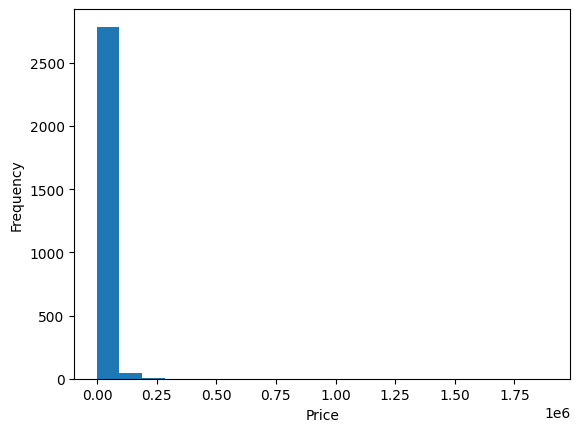

In [1260]:
plt.hist(data_Frame['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [1310]:
print(data_Frame['Price'].skew())

0.6727673656573564


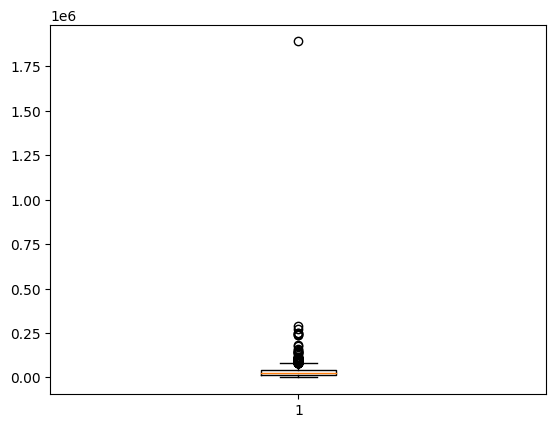

In [1261]:
plt.boxplot(data_Frame['Price'])
plt.show()

#### For better visulaization using logartihmic apporach

#### Visulizing value for Price

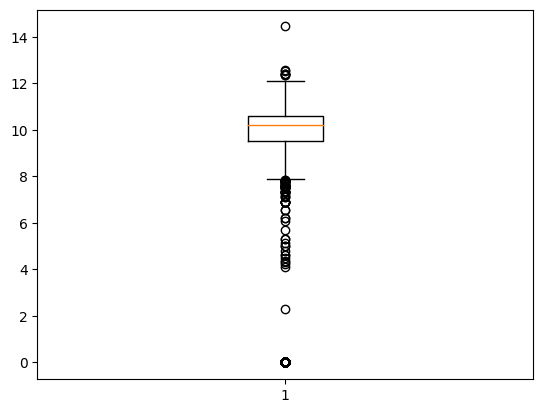

In [1262]:
data_Frame['Log_Price'] = data_Frame['Price'].map(lambda i:np.log(i) if i > 0 else 0)
plt.boxplot(data_Frame['Log_Price'])
plt.show()

<AxesSubplot: >

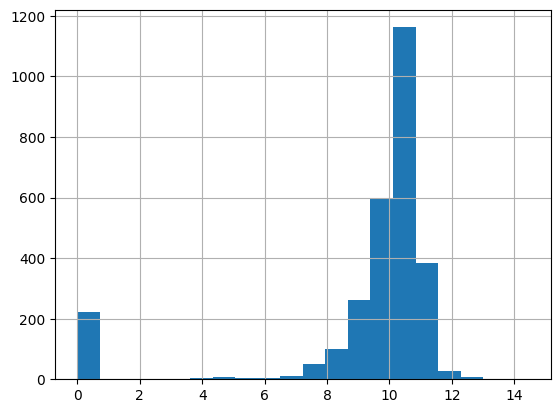

In [1263]:
data_Frame['Log_Price'].hist(bins=20)

#### VIsualizaing the valuee for KM 

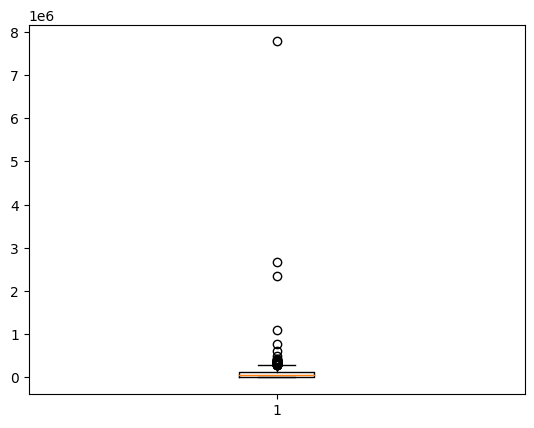

In [1264]:
plt.boxplot(data_Frame['KM'])
plt.show()

#### using logarthimc approach to visualize the column KM values

30.35266231859631
-1.2937015489307941


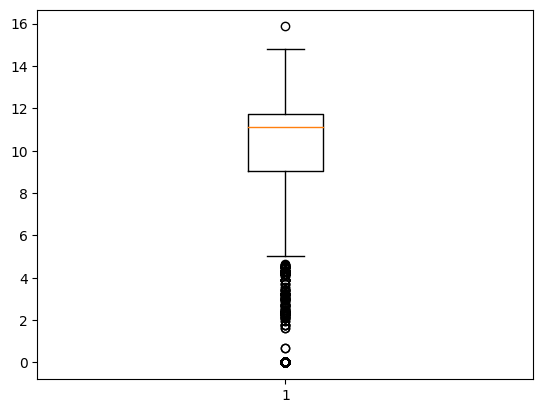

In [1265]:
data_Frame['Log_KM'] = data_Frame['KM'].map(lambda i:np.log(i) if i > 0 else 0)
print(data_Frame['KM'].skew())
print(data_Frame['Log_KM'].skew())
plt.boxplot(data_Frame['Log_KM'])
plt.show()

<AxesSubplot: >

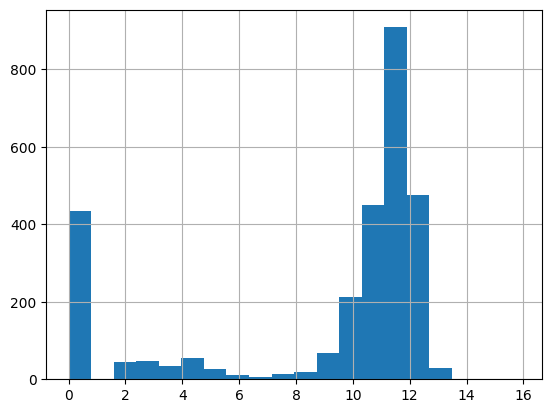

In [1266]:
data_Frame['Log_KM'].hist(bins=20)

#### Using countplot to plot the count of each make 

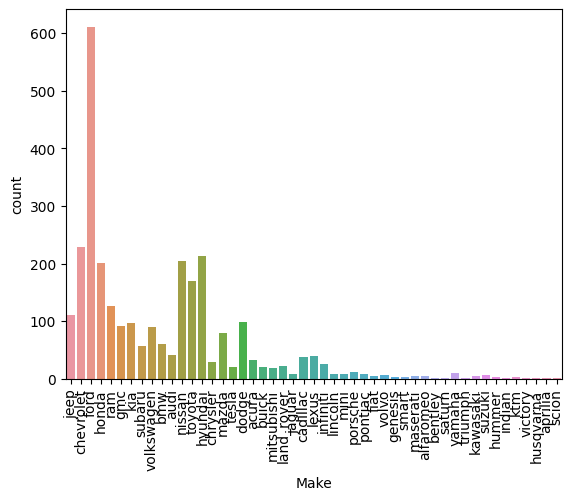

In [1267]:
sns.countplot(x='Make', data=data_Frame)
plt.xticks(rotation=90)
plt.show()

#### Demosntrating count of vehicle fuell type uses

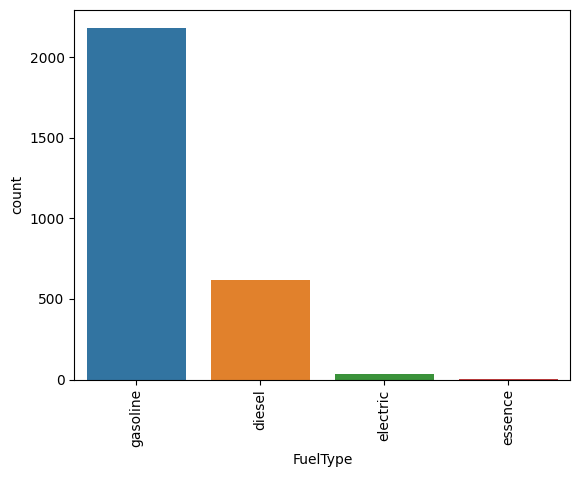

In [1268]:
sns.countplot(x='FuelType', data=data_Frame)
plt.xticks(rotation=90)
plt.show()

#### Plotting the year aginst count of cars manufacgtured in a year

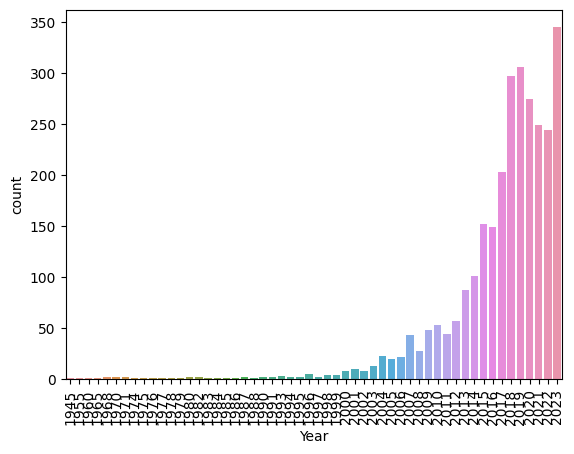

<Figure size 640x480 with 0 Axes>

In [1311]:
sns.countplot(x='Year', data=data_Frame)
plt.xticks(rotation=90)
plt.show()

#### Count of cars new and used

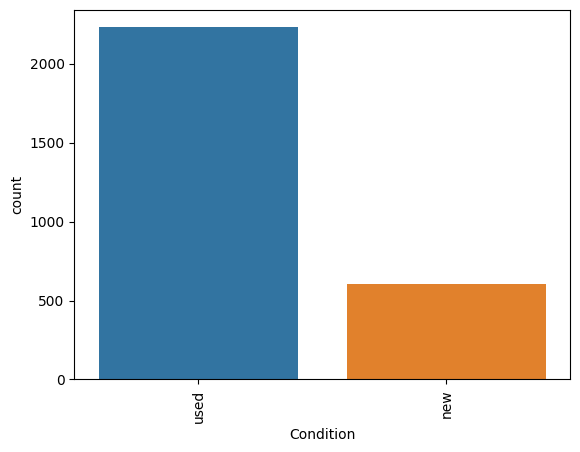

In [1270]:
sns.countplot(x='Condition', data=data_Frame)
plt.xticks(rotation=90)
plt.show()

#### Count of cars based on their body strucutre

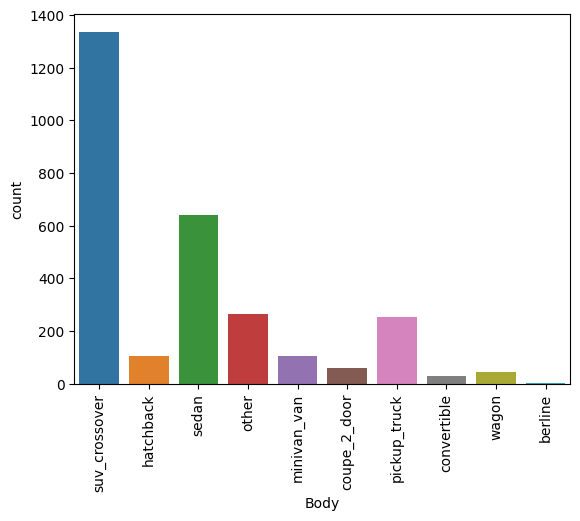

In [1271]:
sns.countplot(x='Body', data=data_Frame)
plt.xticks(rotation=90)
plt.show()

#### Scatter plot to seee the type of relation km and price have

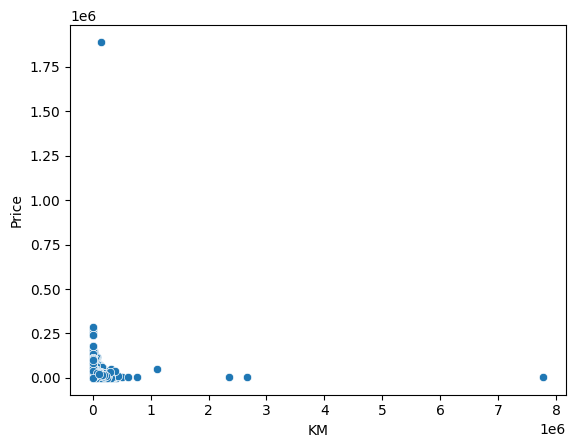

In [1272]:
sns.scatterplot(x='KM', y='Price', data=data_Frame)
plt.show()

#### pair plot to demsontrate the relations of columns with each other

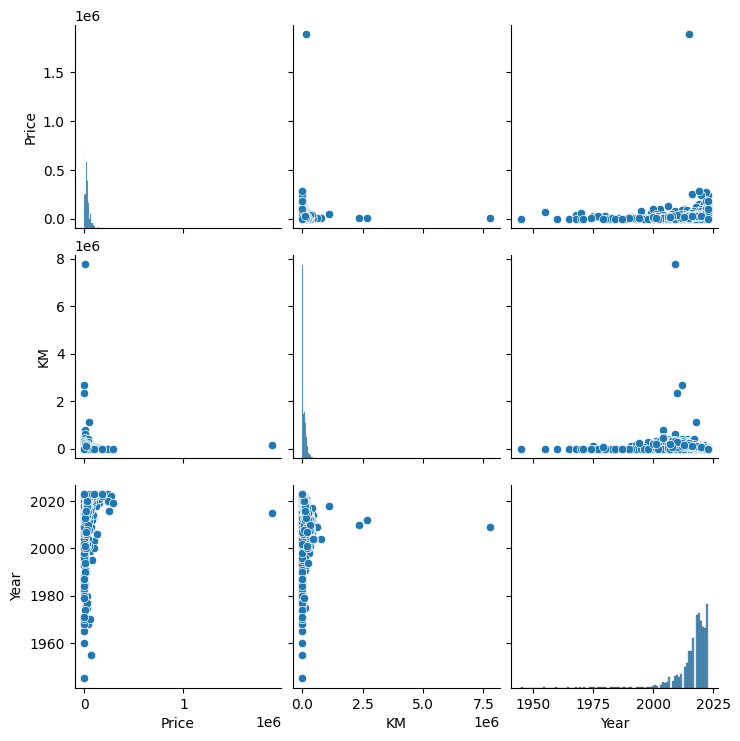

In [1273]:
sns.pairplot(data_Frame[['Price', 'KM', 'Year']])
plt.show()


#### Heat Map to see corelation between columns

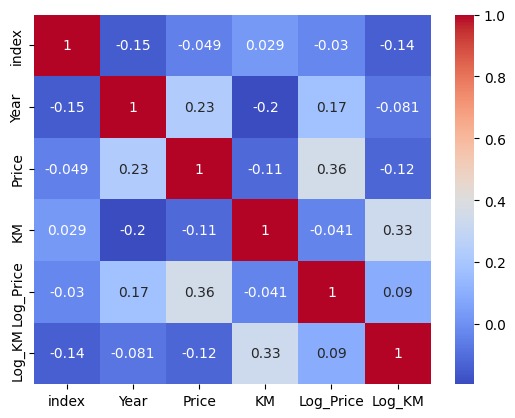

In [1274]:
sns.heatmap(data_Frame.corr(), annot=True, cmap='coolwarm')
plt.show()


<AxesSubplot: >

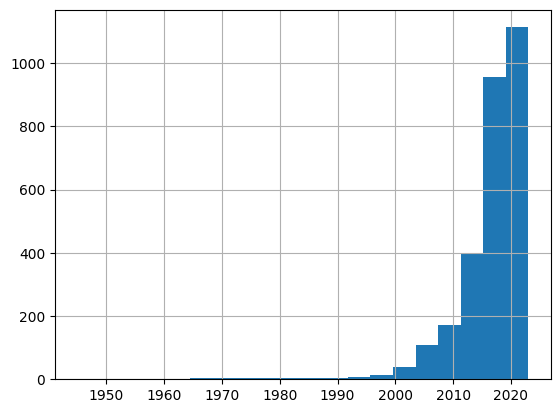

In [1275]:
data_Frame['Year'].hist(bins=20)

#### Demosntrating box plot to identify outliers in the year column

In [1276]:
# data_Frame.to_csv('viz.csv')

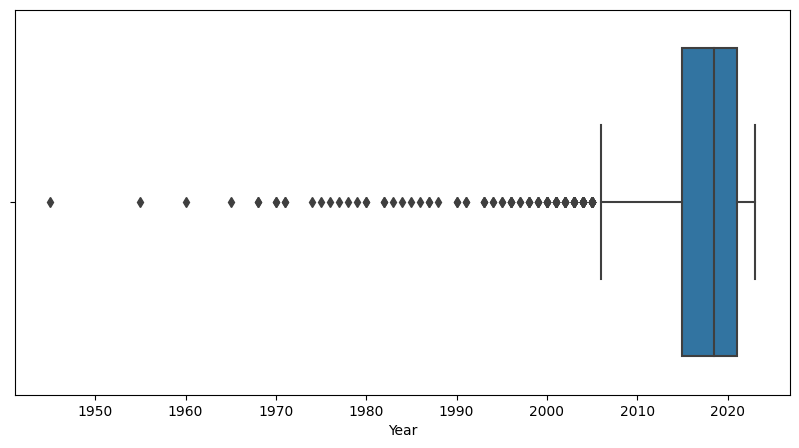

In [1277]:
fig, ax = plt.subplots(figsize=(10, 5)) 
sns.boxplot(x=data_Frame['Year'], ax=ax, order=data_Frame['Year'].unique(), orient='horizontal')
plt.show()

In [1278]:
data_Frame.head(10)

,index,Make,FuelType,Year,Body,Price,Model,Condition,KM,Log_Price,Log_KM
0,0,jeep,gasoline,2020,suv_crossover,30791.0,compass,used,73008,10.334978,11.198324
1,1,chevrolet,gasoline,2018,hatchback,19288.0,cruze,used,65000,9.867238,11.082143
2,2,ford,gasoline,2013,suv_crossover,89995.0,escape,used,83123,11.407509,11.328077
3,3,honda,diesel,2018,sedan,23942.0,civic,used,123930,10.083390,11.727472
4,4,ram,gasoline,2014,other,27495.0,1500,used,130083,10.221759,11.775928
5,5,gmc,gasoline,2023,other,64973.0,sierra_1500,new,65,11.081727,4.174387
6,6,chevrolet,gasoline,2023,other,72255.0,silverado_1500,new,1,11.187957,0.000000
7,7,chevrolet,diesel,2023,other,107986.0,silverado_2500,new,65,11.589757,4.174387
8,8,chevrolet,gasoline,2020,suv_crossover,23900.0,trax,used,49190,10.081634,10.803446
9,9,kia,gasoline,2020,suv_crossover,30295.0,sorento,used,75516,10.318738,11.232100


# Pandas Profiling

In [984]:
profile = ProfileReport(data_Frame, title='Pandas Profiling Report', explorative=True)

In [985]:
profile.to_file(output_file="Car_kijiji_pandas_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Identifying Outliers

#### showcasing the count of outliers in each column 

In [1279]:
for col in data_Frame.select_dtypes(include=['float', 'int']):
    q1 = data_Frame[col].quantile(0.25)
    q3 = data_Frame[col].quantile(0.75)
    iqr = q3 - q1
    outliers = (data_Frame[col] < (q1 - 1.5 * iqr)) | (data_Frame[col] > (q3 + 1.5 * iqr))
    print(f"Column: {col}")
    print(outliers.value_counts())


Column: index
False    2838
Name: index, dtype: int64
Column: Year
False    2703
True      135
Name: Year, dtype: int64
Column: Price
False    2726
True      112
Name: Price, dtype: int64
Column: KM
False    2777
True       61
Name: KM, dtype: int64
Column: Log_Price
False    2534
True      304
Name: Log_Price, dtype: int64
Column: Log_KM
False    2224
True      614
Name: Log_KM, dtype: int64


# Removing Outliers

### IQR Capping and trimming 

In [1280]:
Q1 = data_Frame['Price'].quantile(0.25)
Q3 = data_Frame['Price'].quantile(0.75)

IQR = Q3 - Q1
IQR

26406.75

In [1281]:
lower_whisker = Q1 - (1.5 * IQR)
upper_whisker = Q3 + (1.5 * IQR)
upper_whisker,lower_whisker

(79609.125, -26017.875)

(2838, 11)


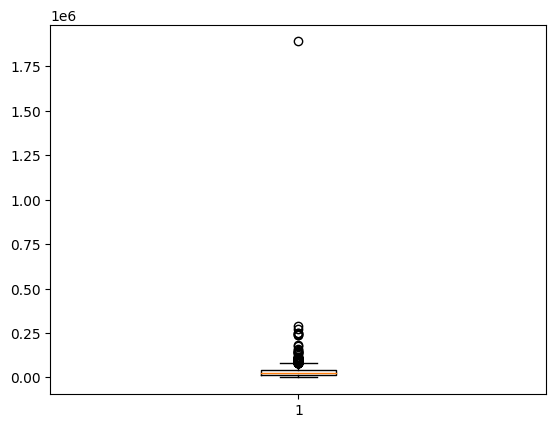

In [1282]:
print(data_Frame.shape)
plt.boxplot(data_Frame['Price'])
plt.show()

In [1283]:
# index = data_Frame[(data_Frame['Price']>= upper_whisker) |( data_Frame['Price']<= lower_whisker)].index

# data_Frame['Price'].drop(index,inplace=True)
# print(data_Frame.shape)
data_Frame['Price'] = np.where(data_Frame['Price']<lower_whisker,lower_whisker,data_Frame['Price'])
data_Frame['Price'] = np.where(data_Frame['Price']>upper_whisker,upper_whisker,data_Frame['Price'])

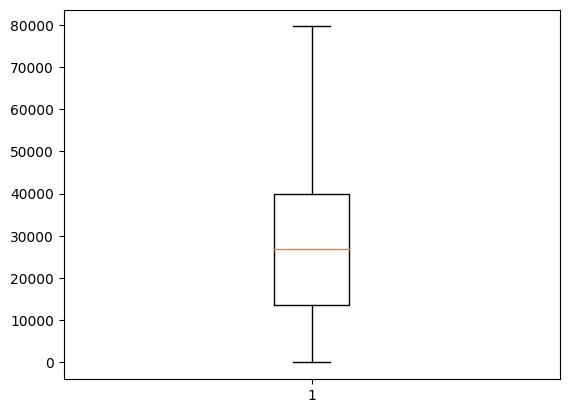

In [1284]:
plt.boxplot(data_Frame['Price'])
plt.show()

#### qunatile to remove values

In [1285]:
min_value = data_Frame['KM'].quantile(0.05)
max_value = data_Frame['KM'].quantile(0.95)

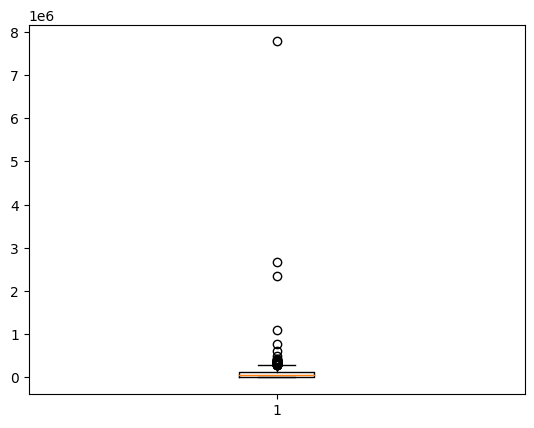

In [1286]:
plt.boxplot(data_Frame['KM'])
plt.show()

In [1287]:
data_Frame['KM'] = np.where(data_Frame['KM']<min_value,min_value,data_Frame['KM'])
data_Frame['KM'] = np.where(data_Frame['KM']>max_value,max_value,data_Frame['KM'])

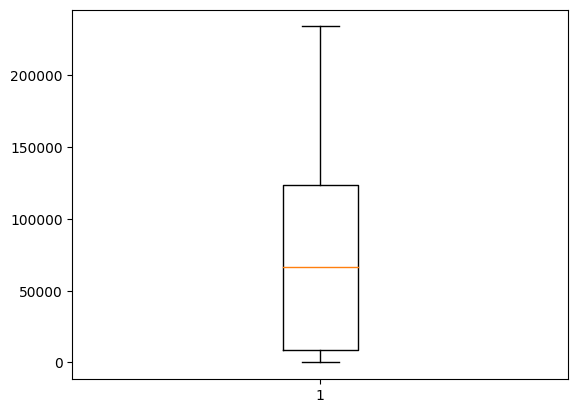

In [1288]:
plt.boxplot(data_Frame['KM'])
plt.show()

In [1289]:
data_Frame['KM'].max()

234141.7500000001

In [1290]:
data_Frame.shape

(2838, 11)

#  Encoding Methods 


In [1291]:
le = LabelEncoder()

In [1292]:
data_Frame['Make_Encoded'] = le.fit_transform(data_Frame['Make'])

In [1293]:
data_Frame['FuelType_Encoded'] = le.fit_transform(data_Frame['FuelType'])

In [1294]:
data_Frame['Body_Encoded'] = le.fit_transform(data_Frame['Body'])


In [1295]:
data_Frame['Model_Encoded'] = le.fit_transform(data_Frame['Model'])


In [1297]:
data_Frame.sample(10)

,index,Make,FuelType,Year,Body,Price,Model,Condition,KM,Log_Price,Log_KM,Make_Encoded,FuelType_Encoded,Body_Encoded,Model_Encoded
1407,1628,jeep,gasoline,2023,suv_crossover,61285.000,wrangler,new,0.0,11.023290,0.000000,22,3,8,304
1387,1602,ford,diesel,2023,suv_crossover,53662.000,edge,new,8.0,10.890460,2.079442,12,0,8,71
736,848,land_rover,diesel,2020,suv_crossover,79609.125,defender,used,16165.0,11.338513,9.690604,26,0,8,65
932,1074,chevrolet,gasoline,2020,suv_crossover,37999.000,blazer,used,30991.0,10.545315,10.341452,8,3,8,26
2506,3937,ram,gasoline,2023,minivan_van,57360.000,promaster,new,0.0,10.957102,0.000000,36,3,4,198
983,1136,mitsubishi,diesel,2017,suv_crossover,23798.000,rvr,used,37826.0,10.077357,10.540752,32,0,8,230
1716,2059,genesis,gasoline,2021,sedan,0.000,g70,used,23369.0,0.000000,10.059166,13,3,7,104
1717,2060,chevrolet,gasoline,2020,suv_crossover,27073.000,trax,used,88999.0,10.206292,11.396380,8,3,8,288
1504,1738,volkswagen,diesel,2014,coupe_2_door,15000.000,beetle,used,183000.0,9.615805,12.117241,46,0,2,24
1823,2300,ford,gasoline,2022,other,60000.000,gla,used,30000.0,11.002100,10.308953,12,3,5,110


In [1298]:
data_Frame.sample(10)

,index,Make,FuelType,Year,Body,Price,Model,Condition,KM,Log_Price,Log_KM,Make_Encoded,FuelType_Encoded,Body_Encoded,Model_Encoded
2211,3248,ford,gasoline,2021,suv_crossover,0.0,escape,new,0.00,0.000000,0.000000,12,3,8,81
1951,2599,ford,diesel,2013,suv_crossover,15480.0,explorer,used,223580.00,9.647304,12.317525,12,0,8,85
2054,2825,volkswagen,gasoline,2012,sedan,6995.0,jetta,used,234141.75,8.852951,12.520883,46,3,7,134
774,892,jeep,gasoline,2023,suv_crossover,73930.0,grand_cherokee,new,94.00,11.210874,4.543295,22,3,8,118
2246,3354,ford,gasoline,1995,suv_crossover,79000.0,escape,new,0.00,11.277203,0.000000,12,3,8,81
1898,2477,chevrolet,gasoline,2018,sedan,22995.0,malibu,used,108455.00,10.043032,11.594091,8,3,7,155
1193,1378,nissan,gasoline,2015,sedan,5888.0,altima,used,230452.00,8.680672,12.347798,33,3,7,17
2677,4174,scion,gasoline,2015,coupe_2_door,13900.0,tc,used,166000.00,9.539644,12.019743,38,3,2,273
2568,4050,dodge,diesel,2019,sedan,27444.0,charger,used,96664.00,10.219903,11.478996,10,0,7,42
1637,1960,ford,gasoline,2020,sedan,34427.0,fusion,used,55548.00,10.446596,10.925003,12,3,7,99


# Unsupervised Learning

In [1299]:
X = data_Frame[['Price', 'KM']]

In [1300]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

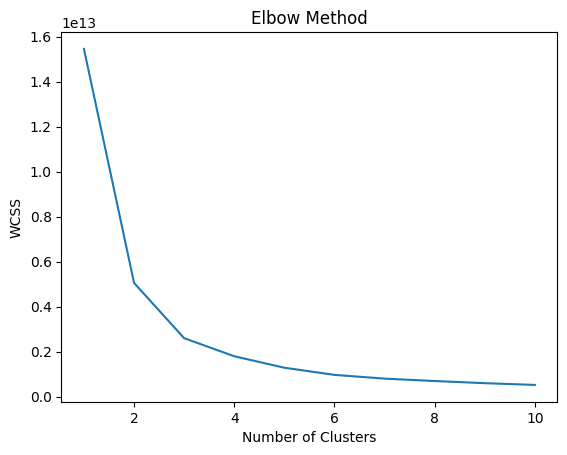

In [1301]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [1302]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

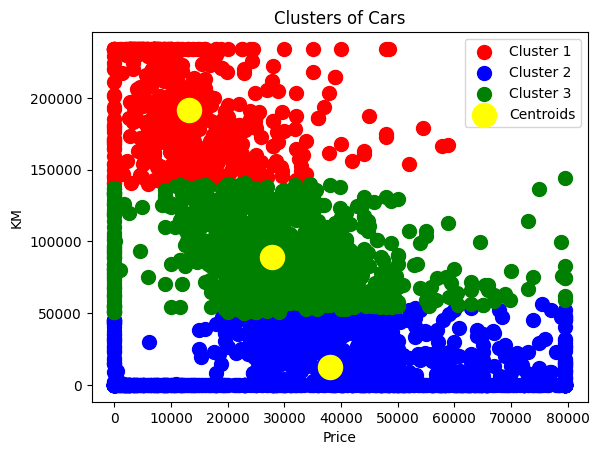

In [1303]:
plt.scatter(X[y_kmeans == 0]['Price'], X[y_kmeans == 0]['KM'], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1]['Price'], X[y_kmeans == 1]['KM'], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2]['Price'], X[y_kmeans == 2]['KM'], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Cars')
plt.xlabel('Price')
plt.ylabel('KM')
plt.legend()
plt.show()


In [ ]:
In this code, we first load the cleaned DataFrame from a CSV file. We then select the "Price" and "KM" columns to use for clustering. We use the elbow method to determine the optimal number of clusters, and then apply K-Means clustering with 3 clusters. Finally, we visualize the clusters using a scatter plot.

The elbow method suggests that 3 clusters are appropriate for this data, so we apply K-Means with 3 clusters. The resulting scatter plot shows the three clusters in different colors, with the centroids represented by yellow markers.

From the scatter plot, we can see that the three clusters roughly correspond to different price ranges and mileage ranges. Cluster 1 (red) contains cars with high mileage and low price, Cluster 2 (blue) contains cars with medium mileage and medium price, and Cluster 3 (green) contains cars with low mileage and high price.

Overall, K-Means clustering provides a useful way to identify patterns and structure in your data without relying on pre-existing labels or categories. It can be particularly useful for segmenting customers, grouping similar products, or identifying anomalies in your data.


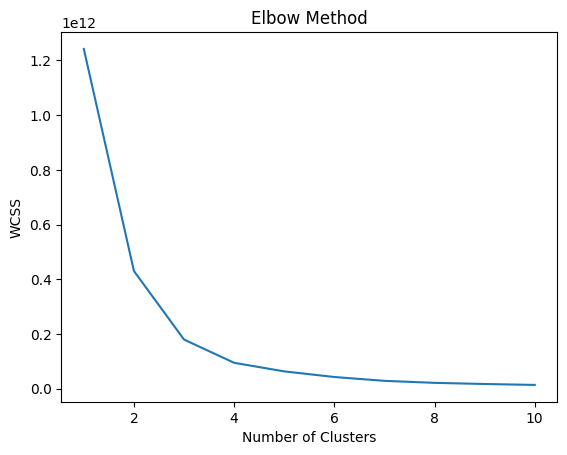

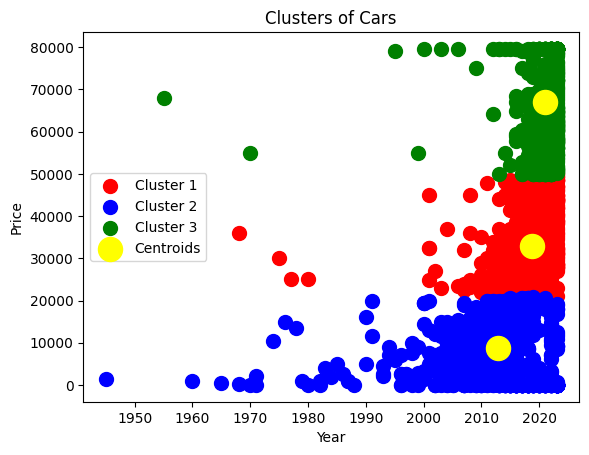

In [1304]:
X = data_Frame[['Year', 'Price']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0]['Year'], X[y_kmeans == 0]['Price'], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1]['Year'], X[y_kmeans == 1]['Price'], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2]['Year'], X[y_kmeans == 2]['Price'], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Cars')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()
